In [1]:
map_rels_no = {'COM':0, 'CONTR':1, 'CORR':2, 'QAP':3, 'ACK':4,'ELAB':5,
                 'CLARIFQ':6, 'COND':7, 'CONTIN':8, 'RES':9, 'EXPL':10, 'QELAB':11,
                 'ALT':12, 'NARR':13, 'CONFQ':14, 'SEQ':15, 'NULL':16}

In [2]:
import pickle
from collections import Counter

In [3]:
home=%pwd

In [4]:
picklepath = home + '/pickles/'

In [5]:
picklepath

'/home/kate/minecraft_utils/llm_annotator/scores/pickles/'

In [6]:
with open(picklepath + 'conf_mtx.pkl', 'rb') as f:
    test_pred = pickle.load(f)

In [7]:
test_pred[:2]

[['CONTIN', 'CONTIN'], ['ELAB', 'ELAB']]

In [8]:
corr_ = [t[0] for t in test_pred]
pred_ = [t[1] for t in test_pred]

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [10]:
print(classification_report(corr_,pred_))

              precision    recall  f1-score   support

         ACK       0.80      0.77      0.78       837
         ALT       0.74      0.79      0.77        29
     CLARIFQ       0.62      0.67      0.64       146
         COM       0.46      0.45      0.46       488
        COND       0.00      0.00      0.00        14
       CONFQ       0.92      0.83      0.88       162
      CONTIN       0.29      0.28      0.29       413
       CONTR       0.67      0.62      0.65        80
        CORR       0.74      0.67      0.70       418
        ELAB       0.46      0.66      0.54       900
        EXPL       0.00      0.00      0.00        16
        NARR       0.77      0.84      0.80       748
        NULL       0.00      0.00      0.00      1060
         QAP       0.82      0.78      0.80       300
       QELAB       0.36      0.33      0.34        43
         RES       0.87      0.88      0.87      1852
         SEQ       0.00      0.00      0.00         7

    accuracy              

#change to numbers 
'COM':0, 
'CONTR':1, 
'CORR':2, 
'QAP':3, 
'ACK':4,
'ELAB':5,
'CLARIFQ':6, 
'COND':7, 
'CONTIN':8, 
'RES':9, 
'EXPL':10, 
'QELAB':11,
'ALT':12, 
'NARR':13, 
'CONFQ':14, 'SEQ':15, 'NULL':16

In [11]:
correct = [map_rels_no[t] for t in corr_]
predicted = [map_rels_no[t] for t in pred_]

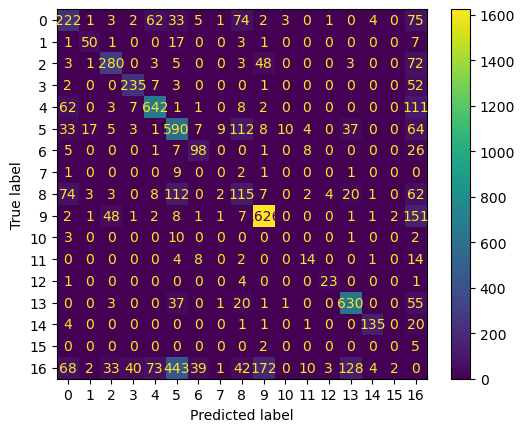

In [12]:
cm = confusion_matrix(correct,predicted)
ConfusionMatrixDisplay(cm).plot()

In [13]:
with open(picklepath + 'conf_mtx_tp.pkl', 'rb') as f:
    test_pred_tp = pickle.load(f)

In [14]:
tpcorr_ = [t[0] for t in test_pred_tp]
tppred_ = [t[1] for t in test_pred_tp]

In [15]:
print(classification_report(tpcorr_,tppred_))

              precision    recall  f1-score   support

         ACK       0.88      0.88      0.88       726
         ALT       0.82      0.82      0.82        28
     CLARIFQ       0.82      0.82      0.82       120
         COM       0.54      0.54      0.54       413
        COND       0.00      0.00      0.00        14
       CONFQ       0.95      0.95      0.95       142
      CONTIN       0.33      0.33      0.33       351
       CONTR       0.68      0.68      0.68        73
        CORR       0.81      0.81      0.81       346
        ELAB       0.71      0.71      0.71       836
        EXPL       0.00      0.00      0.00        14
        NARR       0.91      0.91      0.91       693
         QAP       0.95      0.95      0.95       248
       QELAB       0.48      0.48      0.48        29
         RES       0.96      0.96      0.96      1701
         SEQ       0.00      0.00      0.00         2

    accuracy                           0.81      5736
   macro avg       0.61   

In [16]:
with open(picklepath + 'tp_dict.pkl', 'rb') as f:
    tp_dict = pickle.load(f)

with open(picklepath + 'fp_dict.pkl', 'rb') as f:
    fp_dict = pickle.load(f)

with open(picklepath + 'fn_dict.pkl', 'rb') as f:
    fn_dict = pickle.load(f)

In [17]:
for key in sorted(tp_dict.keys()):
    print(key, len(tp_dict[key]))

1 3353
2 548
3 281
4 173
5 94
6 56
7 55
8 27
9 24
10 21
11 16
12 7
13 2
14 3


In [18]:
for key in sorted(fp_dict.keys()):
    print(key, len(fp_dict[key]))

-2 1
1 1162
2 219
3 78
4 39
5 21
6 13
7 13
8 15
9 16
10 5
11 7
12 1
13 5
14 2
25 1


In [19]:
for key in sorted(fn_dict.keys()):
    print(key, len(fn_dict[key]))

1 656
2 326
3 132
4 61
5 33
6 15
7 10
8 9
9 2
10 1
11 4
12 4
13 1
14 1
